# Capstone Project - The Battle of the Neighborhoods in Toronto (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

Let's get started 



## Introduction: Business Problem <a name="introduction"></a>

This notebook demonstrates a **recommendation model** to recommend an optimal location for a new **restauarant** business in the city of **Toronto**.
For instance, to recommend an optimal location, ABC Company Ltd has appointed me to lead the Data Science Team. The **goal** is to locate and **recommend** which **neighborhood of Toronto** would be the best choice to start a restaurant serving a **specific type of cuisine**. 

**Description & Discussion of the Background**

Toronto is the provincial capital of Ontario and the most populous city in Canada, with an estimated population of 2,956,024 (2018) and an estimated population of 6,341,935 in the Toronto Region (2018.) Located on the shores of the western end of Lake Ontario, Toronto is an international center of business, finance, arts, and culture. Its large population of immigrants from around the globe has also made Toronto one of the most multicultural and cosmopolitan cities in the world.

Toronto is one of Canada's leading tourism destinations. In 2017, the Toronto-area received 43.7 million tourists, of which 10.4 million were domestic visitors and 2.97 million were from the United States, spending a total of $8.84 billion. Toronto has an array of tourist attractions, and a rich cultural life.
Restaurant sales in Canada have grown over the past five years from 61 billion Canadian dollars in 2010 to 85 billion Canadian dollars in 2017. That accumulates to an increase of approximately 24 billion Canadian dollars in the Canadian restaurant industry. The same trend holds good for the city of Toronto.

Chicago-based foodservice database, marketing, and analytics firm, CHD Expert has new data indicating that independent restaurant operators are making an impact in Toronto’s foodservice market landscape. The new data reveals that 69.3 percent of restaurants in Toronto are independent restaurants, whereas only 63.4 percent of nationwide restaurants are considered independent. The focus was to explore the Canadian restaurant landscape, specifically focusing on Toronto’s independent restaurant operator growth, and popular menu types. Toronto’s landscape is distinctly different than the rest of the country. There are more European menu type restaurants in Toronto than in the rest of Canada, making up 5.3 percent of the Toronto landscape, compared to 3.2 nationwide. Data reveals that 9.6 percent of restaurants in Toronto are Asian, whereas Asian restaurants only account for 6.6 percent nationwide. One of the USA’s favorite menu type ‘hamburger,’ does not have as strong of a presence in Canada and is even less predominant is Toronto. As a nation, approximately 6.1 percent of Canadian restaurants serve a ‘hamburger’ menu type.

Considering Toronto’s support for the independent restaurant operators, it is quite evident that starting a restaurant business would earn you more money in comparison to other businesses. As rightly said, “Nothing Comes For Free”, with the profitable business comes also the high competition.  The recommendation system developed here, serve as one of the guides to start a new restaurant business serving a specific type of cuisine like Chinese, American, Indian etc. Also the companies can get benefitted by knowing the best location to start their business, taking into account the competition in that locality. 

**Problem Description**:

Restaurant business involves preparing the food and drinks for the customers in return for the money.  The kind of cuisine each restaurant serves depends on many factors like; location in which it is present, the expertise of the chefs, preferences of the customers etc. Similar is the case with the restaurants in the city of Toronto. Because of the diversity of population living in Toronto, lot of tourists coming in from various parts of the world, there are various kinds of restaurants present. This makes Toronto famous for its wide range of excellent cuisine.
Therefore, it is quite evident that, survival in such a competitive market demands a very good strategy from the new companies who are willing to start a restaurant business in the region of Toronto. Accordingly, various factors have to be investigated to decide upon the location and the type cuisine to be served in the restaurant. Few of them are;
1. Toronto Population and demographics
2. Competitors in that locality
3. The cuisine served by the competitors
4. Study about the popular venues around that locality – for example, Tourist places, Parks, Theaters etc.
5. Study of the locations or neighborhoods based on the Boroughs in which they are present.

And the list goes on….

Choice of an optimal location to start the business is and first and most important step even for a well-funded companies like ABCs.  If this strategy turns out to be successful for them, they can use the same strategy for their future endeavors.

**Target Audience**:

For instance, to recommend an optimal location, ABC Company Ltd has appointed me to lead the Data Science Team. The goal is to locate and recommend which neighborhood of Toronto would be the best choice to start a restaurant serving a specific type of cuisine. Of course, all the factors have to be considered while making a recommendation, this would also increase the confidence of the management.

**Success Criteria**:

A good recommendation of the locality or neighborhood for the restaurant to ABC Company Ltd would be the success criteria for this project.  An ideal recommendation would be the one that is made with the consideration of competition, lack of such restaurant in that location.


## Data <a name="data"></a>

For building the recommendation model, the following data and information is considered for analysis

* Scrapped Wikipedia using **BeautifulSoup**, to extract information about **10 Toronto boroughs**, also known as local authority districts. Also, the local areas or **neighborhoods** for each borough are considered for detailed analysis. 
* **Foursquare API** is used to get **information** about the available **restaurants** in a given **neighborhood and given borough**. The API also provides **information** about the **category** of **restaurants** based on the **cuisine** each restaurant is serving. 
* The **location** data or **address** in the form of **latitude and longitude** was present for each **neighborhood*** in the form of a **.csv** file. 


Lets start with gathering the data required for analysis

##  Scraping the wikipedia page to get the required data about Toronto

**Installing the required packages**

In [1]:
#Installing BeautifulSoup package
!pip install beautifulsoup4

     |████████████████████████████████| 112kB 8.6MB/s eta 0:00:01


In [2]:
#Installing lxml package
!pip install lxml
#!pip install html5lib

     |████████████████████████████████| 5.8MB 30.8MB/s eta 0:00:01███▏            | 3.4MB 30.8MB/s eta 0:00:01


In [3]:
#Installing requests handler
!pip install request

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/30/84/5f/484cfba678967ef58c16fce6890925d5c7172622f20111fbfd
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c1/e3/c1/d02c8c58538853e4c9b78cadb74f6d5c5c370b48a69a7271aa
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c3/c3/24/b5c132b537ab380c02d69e6bd4dec1f5db56b5fe19030473d7
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/d6/a4/78/01b20a9dc224dcc009fab669f7f27b943b8889c5150bd68d8a
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/23/7c/6e/f5b4e09d6596c8b8802b347e48f149031e2363368048f1347a
Successfully built request get post query-string public


**Scrapping the data using BeautifulSoup and exporting it as a csv file**

In [4]:
#Importing the required libraries
from bs4 import BeautifulSoup
import requests
import csv

In [56]:
#Getting the html code for the web page and creating a scrap object
source=requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
soup=BeautifulSoup(source,"lxml")

table_needed=soup.find("table",class_="wikitable sortable")

# Looping through the table to collect the data in rows and columns
output_rows = []
for table_row in table_needed.findAll('tr'):
    columns = table_row.findAll('td')
    output_row = []
    for column in columns:
        output_row.append(column.text)
    output_rows.append(output_row)

# Exporting the table data into a csv file
with open('output_toronto.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(output_rows)

**Dataframe generation**

In [5]:
# Reading the scrapped csv file into a dataframe
import pandas as pd
df=pd.read_csv("output_toronto.csv",header=0)
df.head()

,PostalCode\r\n,Borough\r\n,Neigborhood\r\n
0,M1A\r\n,Not assigned\r\n,\r\n
1,M2A\r\n,Not assigned\r\n,\r\n
2,M3A\r\n,North York\r\n,Parkwoods\r\n
3,M4A\r\n,North York\r\n,Victoria Village\r\n
4,M5A\r\n,Downtown Toronto\r\n,Regent Park / Harbourfront\r\n


In [6]:
#Renaming the columns as per the requirement
df.columns=["PostalCode","Borough","Neighborhood"]
df.head()

,PostalCode,Borough,Neighborhood
0,M1A\r\n,Not assigned\r\n,\r\n
1,M2A\r\n,Not assigned\r\n,\r\n
2,M3A\r\n,North York\r\n,Parkwoods\r\n
3,M4A\r\n,North York\r\n,Victoria Village\r\n
4,M5A\r\n,Downtown Toronto\r\n,Regent Park / Harbourfront\r\n


In [7]:
# String formatting
df = df.replace('\r\n','', regex=True)
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [8]:
# Get names of indexes for which column Borough is not assigned
indexNames = df[ df['Borough'] == 'Not assigned' ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)



In [9]:
df.set_index("PostalCode",inplace=True)
df.head()

,Borough,Neighborhood
PostalCode,,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,Regent Park / Harbourfront
M6A,North York,Lawrence Manor / Lawrence Heights
M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [10]:
df.reset_index(inplace=True)

In [11]:
df.head()


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


The above shown is the resulting data frame as expected from task 1

**Printing the size of the data frame**

In [12]:
df.shape


(103, 3)

In [13]:
print('The data frame consists of {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The data frame consists of 103 rows and 3 columns


In [14]:
df.to_csv('Toronto_data1.csv')

## Adding location information to the data frame

In [15]:
import pandas as pd
geo=pd.read_csv("Geospatial_Coordinates_Toronto.csv")
geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [16]:
#geo.columns=["PostalCode","Latitude","Longitude"]

In [17]:
geo.shape

(103, 3)

In [18]:
geo.set_index("Postal Code", inplace=True)


In [19]:
geo.head()

,Latitude,Longitude
Postal Code,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476


In [20]:
PC_Toronto_list = df['PostalCode'].tolist()
PC_Toronto_list[0:5]

['M3A', 'M4A', 'M5A', 'M6A', 'M7A']

In [21]:
geo_sort=geo.reindex(PC_Toronto_list)

In [22]:
geo_sort.head()

,Latitude,Longitude
Postal Code,,
M3A,43.753259,-79.329656
M4A,43.725882,-79.315572
M5A,43.654260,-79.360636
M6A,43.718518,-79.464763
M7A,43.662301,-79.389494


In [23]:
geo_final=geo_sort.head(180)
geo_final.reset_index(inplace=True)
geo_final.head(25)


,Postal Code,Latitude,Longitude
0,M3A,43.753259,-79.329656
1,M4A,43.725882,-79.315572
2,M5A,43.654260,-79.360636
3,M6A,43.718518,-79.464763
4,M7A,43.662301,-79.389494
5,M9A,43.667856,-79.532242
6,M1B,43.806686,-79.194353
7,M3B,43.745906,-79.352188
8,M4B,43.706397,-79.309937
9,M5B,43.657162,-79.378937


In [24]:
geo_final.rename(columns={'Postal Code':'PostalCode'}, inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
geo_final.head(20)

,PostalCode,Latitude,Longitude
0,M3A,43.753259,-79.329656
1,M4A,43.725882,-79.315572
2,M5A,43.654260,-79.360636
3,M6A,43.718518,-79.464763
4,M7A,43.662301,-79.389494
5,M9A,43.667856,-79.532242
6,M1B,43.806686,-79.194353
7,M3B,43.745906,-79.352188
8,M4B,43.706397,-79.309937
9,M5B,43.657162,-79.378937


**Merging the Latitude and Longitude information of the Neighborhoods with the original data frame**

In [26]:

df_merged=df
# Join method is used to merge two dataframes
df_merged = df_merged.join(geo_final.set_index('PostalCode'), on='PostalCode')

In [27]:
df_merged.head(20)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,Parkview Hill / Woodbine Gardens,43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [28]:
df_merged.shape

(103, 5)

## Methodology: Segmentation and clustering of the neighborhoods in Toronto <a name="methodology"></a> 

**Importing the packages and libraries required**

In [29]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Sol

**Working with the Dataset**

We already have built the datset in the form of a dataframe as df_merged

In [30]:
#Rename the df_merged dataframe as neighborhoods for better understanding

neighborhoods=df_merged
neighborhoods.head(20)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,Parkview Hill / Woodbine Gardens,43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


**Knowing the number of boroughs and neighborhoods present in the datset**

In [31]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


**Use geopy library to get the latitude and longitude values of Toronto City.**

In [32]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


**Create a map of Toronto with neighborhoods superimposed on top**

In [33]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [34]:
neighborhoods.groupby("Borough").count()

,PostalCode,Neighborhood,Latitude,Longitude
Borough,,,,
Central Toronto,9,9,9,9
Downtown Toronto,19,19,19,19
East Toronto,5,5,5,5
East York,5,5,5,5
Etobicoke,12,12,12,12
Mississauga,1,1,1,1
North York,24,24,24,24
Scarborough,17,17,17,17
West Toronto,6,6,6,6


**Utilizing the Foursquare API to explore the neighborhoods and segment them**

In [35]:
CLIENT_ID = 'NPZD3QR4J0P4RYHF0CGHKSFMMRCVYLPGPXOYAQZ0GVFVYA01' # your Foursquare ID
CLIENT_SECRET = '4QNPYGU1VZX0JYURPMMTUTKB5DPNHRKAW54EVL4NYE44LWNB' # your Foursquare Secret
VERSION = '20200417' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NPZD3QR4J0P4RYHF0CGHKSFMMRCVYLPGPXOYAQZ0GVFVYA01
CLIENT_SECRET:4QNPYGU1VZX0JYURPMMTUTKB5DPNHRKAW54EVL4NYE44LWNB


In [36]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
 

In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [40]:
Toronto_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park / Harbourfront
Lawrence Manor / Lawrence Heights
Queen's Park / Ontario Provincial Government
Islington Avenue
Malvern / Rouge
Don Mills
Parkview Hill / Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale
Rouge Hill / Port Union / Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate / Bloordale Gardens / Old Burnhamthorpe / Markland Wood
Guildwood / Morningside / West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor / Wilson Heights / Downsview North
Thorncliffe Park
Richmond / Adelaide / King
Dufferin / Dovercourt Village
Scarborough Village
Fairview / Henry Farm / Oriole
Northwood Park / York University
East Toronto
Harbourfront East / Union Station / Toronto Islands
Little Portugal / Trinity
Kennedy Park / Ionview / East Birchmount Park
Bayview Village
Do

In [41]:
print(Toronto_venues.shape)
Toronto_venues.head()

(2136, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [42]:
# Number of venues for each neighborhood
Toronto_venues.groupby('Neighborhood')
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 269 uniques categories.


# Extracting only restaurants from venue category list and creating a dataframe "Toronto_restaurants"

In [43]:
Toronto_restaurants = Toronto_venues[Toronto_venues['Venue Category'].str.contains("Restaurant")]

In [44]:
print('There are {} unique categories or cusines available in Toronto.'.format(len(Toronto_restaurants['Venue Category'].unique())))

There are 47 unique categories or cusines available in Toronto.


# Analysis of each neighborhood

In [45]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_restaurants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_restaurants['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
4,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
11,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
27,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39,Regent Park / Harbourfront,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
Toronto_onehot.shape

(499, 48)

In [47]:
print('There are {} restaurants in Toronto with {} different style of cuisines.'.format(Toronto_onehot.shape[0],(Toronto_onehot.shape[1]-1)))

There are 499 restaurants in Toronto with 47 different style of cuisines.


# Grouping rows by neighborhood and taking the mean of the frequency of occurrence of each category/restaurants

In [48]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Agincourt,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.0,0.0000,0.0000,0.000000,0.0,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bathurst Manor / Wilson Heights / Downsview North,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.250000,0.00000,0.000000,0.0000,0.0,0.0000,0.0000,0.000000,0.0,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bayview Village,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.500000,0.00000,0.000000,0.0000,0.0,0.0000,0.0000,0.000000,0.0,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Bedford Park / Lawrence Manor East,0.090909,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.090909,0.0000,0.0,0.0000,0.0000,0.000000,0.0,0.00,0.000000,0.090909,0.0000,0.000000,0.000000,0.000000,0.090909,0.000000,0.090909,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.181818,0.000000,0.090909,0.000000,0.090909,0.000000,0.000000,0.000000
4,Berczy Park,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.071429,0.0000,0.0,0.0000,0.0000,0.071429,0.0,0.00,0.000000,0.000000,0.0000,0.071429,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.142857,0.071429,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.142857,0.142857,0.000000,0.000000,0.071429,0.000000,0.071429,0.000000
5,Brockton / Parkdale Village / Exhibition Place,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.0,0.0000,0.0000,0.000000,0.0,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Business reply mail Processing CentrE,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.0,0.0000,0.0000,0.000000,0.0,0.00,0.000000,0.500000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Canada Post Gateway Processing Ce

In [49]:
Toronto_grouped.shape

(65, 48)

# Top 3 restaurants for each Neighborhood based on cuisine

In [50]:
num_top_rest = 3

for hood in Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_rest))
    print('\n')

----Agincourt----
                       venue  freq
0  Latin American Restaurant   1.0
1        American Restaurant   0.0
2        Moroccan Restaurant   0.0


----Bathurst Manor / Wilson Heights / Downsview North----
                venue  freq
0  Chinese Restaurant  0.25
1    Sushi Restaurant  0.25
2          Restaurant  0.25


----Bayview Village----
                 venue  freq
0  Japanese Restaurant   0.5
1   Chinese Restaurant   0.5
2  American Restaurant   0.0


----Bedford Park / Lawrence Manor East----
                 venue  freq
0   Italian Restaurant  0.18
1           Restaurant  0.18
2  American Restaurant  0.09


----Berczy Park----
                venue  freq
0  Seafood Restaurant  0.14
1          Restaurant  0.14
2  Italian Restaurant  0.14


----Brockton / Parkdale Village / Exhibition Place----
                 venue  freq
0   Italian Restaurant   0.5
1           Restaurant   0.5
2  American Restaurant   0.0


----Business reply mail Processing CentrE----
            

# Creating a new dataframe with the above results for each neighborhood

In [107]:
# A function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [108]:
#Creating a new dataframe and displaying the top 10 restaurants based on occurance and cuisine for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']


for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Vietnamese Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant
1,Bathurst Manor / Wilson Heights / Downsview North,Middle Eastern Restaurant,Sushi Restaurant,Restaurant,Chinese Restaurant,Vietnamese Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
2,Bayview Village,Japanese Restaurant,Chinese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
3,Bedford Park / Lawrence Manor East,Restaurant,Italian Restaurant,American Restaurant,Greek Restaurant,Thai Restaurant,Fast Food Restaurant,Sushi Restaurant,Indian Restaurant,Comfort Food Restaurant,Doner Restaurant
4,Berczy Park,Seafood Restaurant,Restaurant,Italian Restaurant,French Restaurant,Thai Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Japanese Restaurant,Eastern European Restaurant


# Clustering Neighborhoods using K-means

In [109]:
# Creating new dataframe to determine best k value by dropping first column
Toronto_clustering_testing = Toronto_grouped.drop('Neighborhood', 1)

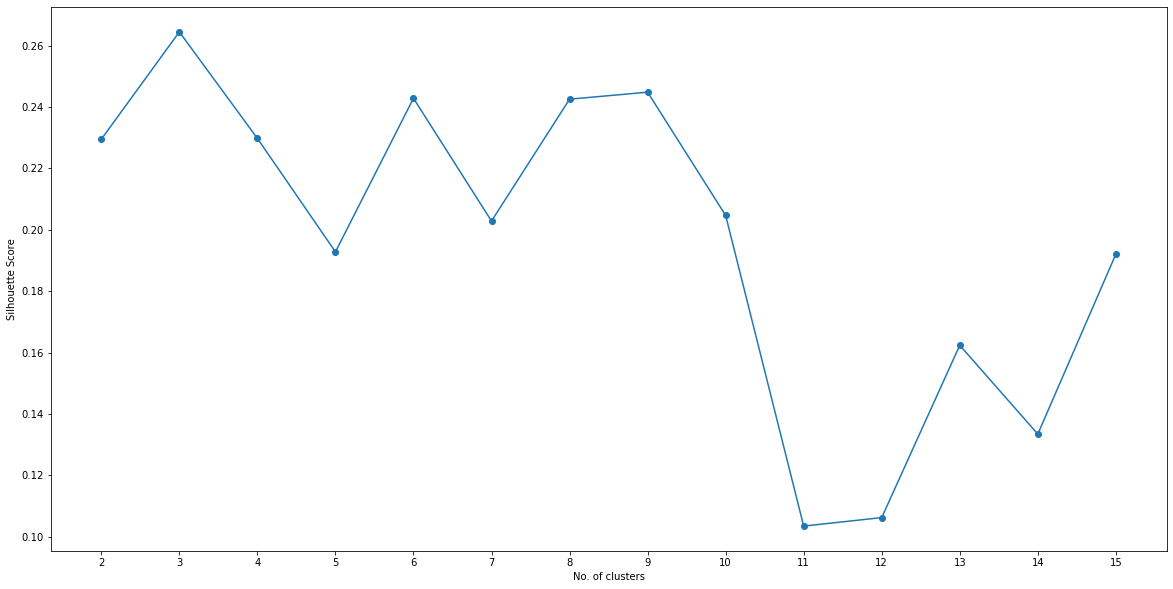

In [110]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt


def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()
    
indices = []
scores = []
max_range = 16

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    Tot = Toronto_clustering_testing
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(Tot)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(Tot, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)
    

plot(max_range, scores, "No. of clusters", "Silhouette Score")



# From the graph the optimal number is found out to be considered for our clustering

In [111]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

3

In [112]:
# set number of clusters
kclusters = opt

Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

# Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [113]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_merged = Toronto_restaurants

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Toronto_merged.fillna(0)
Toronto_merged.head() # check the last columns!

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,2,Portuguese Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant
11,Regent Park / Harbourfront,43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant,2,Restaurant,Asian Restaurant,French Restaurant,Mexican Restaurant,Vietnamese Restaurant,Doner Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
27,Regent Park / Harbourfront,43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant,2,Restaurant,Asian Restaurant,French Restaurant,Mexican Restaurant,Vietnamese Restaurant,Doner Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
31,Regent Park / Harbourfront,43.654260,-79.360636,Cocina Economica,43.654959,-79.365657,Mexican Restaurant,2,Restaurant,Asian Restaurant,French Restaurant,Mexican Restaurant,Vietnamese Restaurant,Doner Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
39,Regent Park / Harbourfront,43.654260,-79.360636,Izumi,43.649970,-79.360153,Asian Restaurant,2,Restaurant,Asian Restaurant,French Restaurant,Mexican Restaurant,Vietnamese Restaurant,Doner Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant


# Number of venues belonging to each cluster

In [114]:
Toronto_merged['Cluster Labels'].value_counts()


2    486
1      8
0      5
Name: Cluster Labels, dtype: int64

# Creating map for each cluster for better visualization

In [115]:
import folium
# create map
#Latitude=neighborhoods["Latitude"].to_list
#Longitude=neighborhoods["Longitude"].to_list


map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
count=0
for lat, lon, poi, cluster, vc in zip(Toronto_merged['Venue Latitude'], Toronto_merged['Venue Longitude'], Toronto_merged['Venue'], Toronto_merged['Cluster Labels'], Toronto_merged['Venue Category']):
    label = folium.Popup(str(poi) +' (' +str(vc) + ') ['+ str(cluster)+']', parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
    count += 1
map_clusters

# Analysis: Each cluster of the neighborhoods in Toronto

**Now, examining each cluster and determining the discriminating restaurants that distinguish each cluster. Based on the restaurants, we can then assign a name to each cluster.**

# Cluster 1

In [116]:
c1 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0, Toronto_merged.columns[[0]+list(range(8, Toronto_merged.shape[1]))]]
c1.drop_duplicates()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
101,Malvern / Rouge,Fast Food Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant,Eastern European Restaurant
118,Parkview Hill / Woodbine Gardens,Fast Food Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant,Eastern European Restaurant
1750,South Steeles / Silverstone / Humbergate / Jam...,Japanese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant
2126,Mimico NW / The Queensway West / South of Bloo...,Fast Food Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant,Eastern European Restaurant


In [117]:
c1.shape

(5, 11)

In [118]:
c1_table = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0, Toronto_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Toronto_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c1_table['Venue Latitude'], c1_table['Venue Longitude'], c1_table['Venue'], c1_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.7).add_to(map_clusters)
    count += 1
map_clusters

# Cluster 2

In [119]:
c2 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[0]+list(range(8, Toronto_merged.shape[1]))]]
c2.drop_duplicates()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
926,Kennedy Park / Ionview / East Birchmount Park,Chinese Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant
931,Bayview Village,Japanese Restaurant,Chinese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
1418,Westmount,Chinese Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant
1754,Steeles West / L'Amoreaux West,Fast Food Restaurant,Chinese Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant


In [120]:
c2.shape

(8, 11)

In [128]:
c2_table = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Toronto_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c2_table['Venue Latitude'], c2_table['Venue Longitude'], c2_table['Venue'], c2_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='mediumslateblue',
        fill=True,
        fill_color='mediumslateblue',
        fill_opacity=0.7).add_to(map_clusters)
    count += 1
map_clusters

# Cluster 3

In [122]:
c3 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[0]+list(range(8, Toronto_merged.shape[1]))]]
c3.drop_duplicates()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Victoria Village,Portuguese Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant
11,Regent Park / Harbourfront,Restaurant,Asian Restaurant,French Restaurant,Mexican Restaurant,Vietnamese Restaurant,Doner Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
54,Lawrence Manor / Lawrence Heights,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant,Eastern European Restaurant
66,Queen's Park / Ontario Provincial Government,Sushi Restaurant,Italian Restaurant,Mexican Restaurant,Vietnamese Restaurant,Doner Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
103,Don Mills,Asian Restaurant,Restaurant,Japanese Restaurant,Dim Sum Restaurant,Caribbean Restaurant,Chinese Restaurant,Italian Restaurant,Eastern European Restaurant,French Restaurant,Filipino Restaurant
128,"Garden District, Ryerson",Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Thai Restaurant,Fast Food Restaurant,Ramen Restaurant,Italian Restaurant,Vietnamese Restaurant,Modern European Restaurant,Chinese Restaurant
220,Glencairn,Asian Restaurant,Japanese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
254,Woodbine Heights,Asian Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant
257,St. James Town,American Restaurant,Italian Restaurant,Moroccan Restaurant,Seafood Restaurant,Restaurant,French Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Comfort Food Restaurant
351,Guildwood / Morningside / West Hill,Mexican Restaurant,Vietnamese Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant


In [123]:
c3.shape

(486, 11)

In [124]:
c3_table = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Toronto_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c3_table['Venue Latitude'], c3_table['Venue Longitude'], c3_table['Venue'], c3_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='aquamarine',
        fill=True,
        fill_color='aquamarine',
        fill_opacity=0.7).add_to(map_clusters)
    count += 1
map_clusters

In [131]:
c3.groupby("9th Most Common Venue").count()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,10th Most Common Venue
9th Most Common Venue,,,,,,,,,,
Brazilian Restaurant,32,32,32,32,32,32,32,32,32,32
Caribbean Restaurant,23,23,23,23,23,23,23,23,23,23
Comfort Food Restaurant,11,11,11,11,11,11,11,11,11,11
Cuban Restaurant,16,16,16,16,16,16,16,16,16,16
Dim Sum Restaurant,11,11,11,11,11,11,11,11,11,11
Doner Restaurant,25,25,25,25,25,25,25,25,25,25
Eastern European Restaurant,24,24,24,24,24,24,24,24,24,24
Empanada Restaurant,15,15,15,15,15,15,15,15,15,15
Ethiopian Restaurant,30,30,30,30,30,30,30,30,30,30


In [140]:
dict = {'Cluster':[1, 2, 3], 
        'Most Common Restaurant': ["Fast Food", "Chinese Restaurant", "Italian Restaurant"], 
        'Least Common Restaurant': ["Eastern European Restaurant","Empanda Restaurant","Gulten-free Restaurant"],
        '2nd Least Common Restaurant':["Empanda Restaurant", "Ehiopian Restaurant","Japanese Restaurant"]} 

results=pd.DataFrame(dict)

In [142]:
results

,Cluster,Most Common Restaurant,Least Common Restaurant,2nd Least Common Restaurant
0,1,Fast Food,Eastern European Restaurant,Empanda Restaurant
1,2,Chinese Restaurant,Empanda Restaurant,Ehiopian Restaurant
2,3,Italian Restaurant,Gulten-free Restaurant,Japanese Restaurant


# IV. RESULTS & DISCUSSION

The results can be analyzed in two ways:
1.	If ABC Company Ltd wants to open a restaurant in an already decided location irrespective of the cuisine, then it’s good for them to serve a cuisine which is not being served by any of the restaurants in that location. This would bring good profits to the company.

2.	In contrast, if the ABC Company Ltd wants to open a restaurant serving a specific cuisine irrespective of the location, then it’s preferred to open the restaurant in a location where this kind of cuisine is not served or at least served by least number of restaurants.  


# V. CONCLUSION

This model is built on limited amount of data available. Therefore, the recommendation made might not be totally accurate. With the availability of more amount of data, this model can make better recommendations.  It has been primarily observed that, even though Toronto has large number of restaurants, they are all present only in certain neighborhoods. Few neighborhoods have very less number of restaurants serving only few kinds of cuisine. Therefore, there is a lot of scope to start new restaurants in such locations, serving the cuisines not available till date.

For example, every neighborhood can be checked for number of restaurants available and the type of cuisine being served. Accordingly, a location with lowest competition and thereby lowest risk can be chosen to start a new restaurant business.


**Thank you for visiting**